In [1]:
import pandas as pd
import numpy as np

In [2]:
action_collection_to_product_category = {
    'Mid-Season Jewelry and Timepieces': 'Jewelry',
    'Sailor Collection': 'Women Accessory',
    'Spring Collection': 'Women Bags',
    'Formal Retail Action': 'Women Ready-to-Wear',
    'Spring-Summer Collection': 'Women Small Leather Goods',
    'Fall Collection': 'Men Ready-to-Wear',
    'Art Collection': 'Men Accessory',
    'Winter Collection': 'Men Shoes',
    'Retail Action': 'Men Bags',
    'Timepieces Collection': 'Men Small Leather Goods',
    'Summer Collection': 'Woman Shoes',
    'Fall-Winter Collection': 'Watches',
    "Cote d'Azur Collection": 'Child',
    'Small Jewelry and Timepieces': 'Women Ready-to-Wear',
    'ABCDER Collection': 'Woman Shoes',
    'Lady Collection': 'Women Ready-to-Wear',
    'Glamorous Collection': 'Women Ready-to-Wear'
}

In [3]:
for_dashboard = pd.read_csv('../OneDrive_1_2024-2-19/for_dashboard.csv')
for_dashboard.columns

Index(['client_id', 'client_country', 'client_gender', 'client_nationality',
       'client_city', 'client_premium_status', 'client_is_phone_contactable',
       'client_is_email_contactable',
       'client_is_instant_messaging_contactable', 'client_is_contactable',
       'action_collection', 'Guest_List', 'gross_amount_euro',
       'client_is_present', 'Women Accessory_interest',
       'Women Ready-to-Wear_interest', 'Woman Shoes_interest',
       'Women Bags_interest', 'Women Small Leather Goods_interest',
       'Jewelry_interest', 'Men Ready-to-Wear_interest', 'Men Shoes_interest',
       'Men Accessory_interest', 'Men Small Leather Goods_interest',
       'Men Bags_interest', 'Watches_interest', 'Child_interest'],
      dtype='object')

In [4]:
clients = pd.read_excel('../OneDrive_1_2024-2-19/clients.xlsx')
actions = pd.read_excel('../OneDrive_1_2024-2-19/actions.xlsx')
transactions = pd.read_excel('../OneDrive_1_2024-2-19/transactions.xlsx')

In [5]:
# drop all the clients that are not present in transactions
print(clients.shape)
clients = clients[clients['client_id'].isin(transactions['client_id'])]
print(clients.shape)

(28751, 10)
(13884, 10)


# Create a final output for each client and action_channel

In [6]:
actions.columns

Index(['action_id', 'action_type_label', 'action_subcategory_label',
       'action_start_date', 'action_year', 'action_end_date',
       'action_collection_year', 'action_collection', 'action_universe',
       'action_category_label', 'action_channel', 'action_label', 'client_id',
       'client_is_present', 'client_is_invited'],
      dtype='object')

In [7]:
unique_collections = pd.DataFrame(actions['action_collection'].unique())
unique_collections = unique_collections.dropna()
unique_collections

,0
0,Mid-Season Jewelry and Timepieces
1,Sailor Collection
2,Spring Collection
3,Formal Retail Action
4,Spring-Summer Collection
5,Fall Collection
6,Art Collection
7,Winter Collection
8,Retail Action
9,Timepieces Collection


In [8]:
output = clients.copy()
output = pd.concat([output]*len(unique_collections), ignore_index=True).sort_values(by='client_id')
output

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable
56009,c00029531,KR,F,KOR,NaN,0,1,1,1,1
153197,c00029531,KR,F,KOR,NaN,0,1,1,1,1
125429,c00029531,KR,F,KOR,NaN,0,1,1,1,1
42125,c00029531,KR,F,KOR,NaN,0,1,1,1,1
180965,c00029531,KR,F,KOR,NaN,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
204020,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0
79064,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0
134600,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0
217904,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0


In [9]:
output.reset_index(drop=True, inplace=True)

In [10]:
action_collection_to_merge = pd.concat([unique_collections]*len(clients), ignore_index=True)

In [11]:
print(action_collection_to_merge.shape)
action_collection_to_merge[0].unique()

(236028, 1)


array(['Mid-Season Jewelry and Timepieces', 'Sailor Collection',
       'Spring Collection', 'Formal Retail Action',
       'Spring-Summer Collection', 'Fall Collection', 'Art Collection',
       'Winter Collection', 'Retail Action', 'Timepieces Collection',
       'Summer Collection', 'Fall-Winter Collection',
       "Cote d'Azur Collection", 'Small Jewelry and Timepieces',
       'ABCDER Collection', 'Lady Collection', 'Glamorous Collection'],
      dtype=object)

In [12]:
output['action_collection'] = action_collection_to_merge

In [13]:
output_0 = output.copy()
output.head()

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable,action_collection
0,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Mid-Season Jewelry and Timepieces
1,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Sailor Collection
2,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Spring Collection
3,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Formal Retail Action
4,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Spring-Summer Collection


In [14]:
for_dashboard.columns

Index(['client_id', 'client_country', 'client_gender', 'client_nationality',
       'client_city', 'client_premium_status', 'client_is_phone_contactable',
       'client_is_email_contactable',
       'client_is_instant_messaging_contactable', 'client_is_contactable',
       'action_collection', 'Guest_List', 'gross_amount_euro',
       'client_is_present', 'Women Accessory_interest',
       'Women Ready-to-Wear_interest', 'Woman Shoes_interest',
       'Women Bags_interest', 'Women Small Leather Goods_interest',
       'Jewelry_interest', 'Men Ready-to-Wear_interest', 'Men Shoes_interest',
       'Men Accessory_interest', 'Men Small Leather Goods_interest',
       'Men Bags_interest', 'Watches_interest', 'Child_interest'],
      dtype='object')

In [15]:
recency_score = pd.read_csv('../features/recency_score.csv')
frequency_score = pd.read_csv('../features/frequency_score.csv')
monetary_score = pd.read_csv('../features/avg_expenditure.csv')
client_presence_rate = pd.read_csv('../features/client_response_rate.csv')
client_interests = pd.read_csv('../features/client_interests.csv')
stimulation_rates = pd.read_csv('../features/stimulation_rates.csv')

In [16]:
output_0 = output.copy()
output_0

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable,action_collection
0,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Mid-Season Jewelry and Timepieces
1,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Sailor Collection
2,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Spring Collection
3,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Formal Retail Action
4,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Spring-Summer Collection
...,...,...,...,...,...,...,...,...,...,...,...
236023,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Cote d'Azur Collection
236024,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Small Jewelry and Timepieces
236025,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,ABCDER Collection
236026,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Lady Collection


# Merging on recency score

In [17]:
recency_score

,client_id,recency_score
0,c29664181,1.000000
1,c63089531,1.000000
2,c92533582,1.000000
3,c86042783,1.000000
4,c18695149,0.999328
...,...,...
13879,c17772013,0.000672
13880,c23283658,0.000672
13881,c00822467,0.000672
13882,c36564816,0.000672


In [18]:
output_recency = pd.merge(output, recency_score, on='client_id', how='left')
output_recency
output = output_recency.copy()
output

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable,action_collection,recency_score
0,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Mid-Season Jewelry and Timepieces,0.763954
1,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Sailor Collection,0.763954
2,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Spring Collection,0.763954
3,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Formal Retail Action,0.763954
4,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Spring-Summer Collection,0.763954
...,...,...,...,...,...,...,...,...,...,...,...,...
236023,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Cote d'Azur Collection,0.934095
236024,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Small Jewelry and Timepieces,0.934095
236025,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,ABCDER Collection,0.934095
236026,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Lady Collection,0.934095


In [19]:
output.isna().sum()

client_id                                       0
client_country                              58752
client_gender                               96101
client_nationality                          95948
client_city                                118031
client_premium_status                           0
client_is_phone_contactable                     0
client_is_email_contactable                     0
client_is_instant_messaging_contactable         0
client_is_contactable                           0
action_collection                               0
recency_score                                   0
dtype: int64

# Merging on frequency score

In [20]:
frequency_score.head()

,client_id,transaction_count,frequency_score
0,c81328703,394,1.000000
1,c93212715,337,0.854962
2,c15284276,241,0.610687
3,c27492922,186,0.470738
4,c25819964,185,0.468193


In [21]:
output_frequency = pd.merge(output, frequency_score, on='client_id', how='left')
output = output_frequency.copy()
output

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable,action_collection,recency_score,transaction_count,frequency_score
0,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Mid-Season Jewelry and Timepieces,0.763954,3,0.005089
1,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Sailor Collection,0.763954,3,0.005089
2,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Spring Collection,0.763954,3,0.005089
3,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Formal Retail Action,0.763954,3,0.005089
4,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Spring-Summer Collection,0.763954,3,0.005089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236023,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Cote d'Azur Collection,0.934095,1,0.000000
236024,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Small Jewelry and Timepieces,0.934095,1,0.000000
236025,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,ABCDER Collection,0.934095,1,0.000000
236026,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Lady Collection,0.934095,1,0.000000


In [22]:
output.isna().sum()

client_id                                       0
client_country                              58752
client_gender                               96101
client_nationality                          95948
client_city                                118031
client_premium_status                           0
client_is_phone_contactable                     0
client_is_email_contactable                     0
client_is_instant_messaging_contactable         0
client_is_contactable                           0
action_collection                               0
recency_score                                   0
transaction_count                               0
frequency_score                                 0
dtype: int64

# Merge on monetary score

In [23]:
monetary_score.sort_values(by='gross_amount_euro', ascending=False)

,client_id,gross_amount_euro,avg_gross_amount_euro
13829,c99664410,1.000000,92259.0
12955,c92952672,0.837685,77291.0
3608,c26071615,0.752570,69442.0
1878,c13341021,0.710278,65542.0
12356,c88345204,0.576738,53227.5
...,...,...,...
3091,c22379150,0.000249,66.0
4395,c31746734,0.000141,56.0
11303,c80327907,0.000108,53.0
6413,c45547368,0.000108,53.0


In [24]:
output_monetary = pd.merge(output, monetary_score, on='client_id', how='left')
output = output_monetary.copy()
output

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable,action_collection,recency_score,transaction_count,frequency_score,gross_amount_euro,avg_gross_amount_euro
0,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Mid-Season Jewelry and Timepieces,0.763954,3,0.005089,0.023684,2227.0
1,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Sailor Collection,0.763954,3,0.005089,0.023684,2227.0
2,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Spring Collection,0.763954,3,0.005089,0.023684,2227.0
3,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Formal Retail Action,0.763954,3,0.005089,0.023684,2227.0
4,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Spring-Summer Collection,0.763954,3,0.005089,0.023684,2227.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236023,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Cote d'Azur Collection,0.934095,1,0.000000,0.011083,1065.0
236024,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Small Jewelry and Timepieces,0.934095,1,0.000000,0.011083,1065.0
236025,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,ABCDER Collection,0.934095,1,0.000000,0.011083,1065.0
236026,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Lady Collection,0.934095,1,0.000000,0.011083,1065.0


In [25]:
output.isna().sum()

client_id                                       0
client_country                              58752
client_gender                               96101
client_nationality                          95948
client_city                                118031
client_premium_status                           0
client_is_phone_contactable                     0
client_is_email_contactable                     0
client_is_instant_messaging_contactable         0
client_is_contactable                           0
action_collection                               0
recency_score                                   0
transaction_count                               0
frequency_score                                 0
gross_amount_euro                               0
avg_gross_amount_euro                           0
dtype: int64

# Merge on presence rate

In [26]:
client_presence_rate.head()

,client_id,response_rate
0,c17974679,1.0
1,c83561585,1.0
2,c94912160,1.0
3,c41079463,1.0
4,c70728767,0.0


In [27]:
output_presence = pd.merge(output, client_presence_rate, on='client_id', how='left')
output = output_presence.copy()
output

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable,action_collection,recency_score,transaction_count,frequency_score,gross_amount_euro,avg_gross_amount_euro,response_rate
0,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Mid-Season Jewelry and Timepieces,0.763954,3,0.005089,0.023684,2227.0,0.0
1,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Sailor Collection,0.763954,3,0.005089,0.023684,2227.0,0.0
2,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Spring Collection,0.763954,3,0.005089,0.023684,2227.0,0.0
3,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Formal Retail Action,0.763954,3,0.005089,0.023684,2227.0,0.0
4,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Spring-Summer Collection,0.763954,3,0.005089,0.023684,2227.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236023,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Cote d'Azur Collection,0.934095,1,0.000000,0.011083,1065.0,NaN
236024,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Small Jewelry and Timepieces,0.934095,1,0.000000,0.011083,1065.0,NaN
236025,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,ABCDER Collection,0.934095,1,0.000000,0.011083,1065.0,NaN
236026,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Lady Collection,0.934095,1,0.000000,0.011083,1065.0,NaN


In [28]:
output.isna().sum()

client_id                                       0
client_country                              58752
client_gender                               96101
client_nationality                          95948
client_city                                118031
client_premium_status                           0
client_is_phone_contactable                     0
client_is_email_contactable                     0
client_is_instant_messaging_contactable         0
client_is_contactable                           0
action_collection                               0
recency_score                                   0
transaction_count                               0
frequency_score                                 0
gross_amount_euro                               0
avg_gross_amount_euro                           0
response_rate                              168181
dtype: int64

# Merge on client interests

In [29]:
client_interests.head()

,client_id,product_category,sfisf
0,c00029531,Women Accessory,0.081696
1,c00029531,Women Small Leather Goods,0.258453
2,c00055636,Men Bags,0.425303
3,c00055636,Women Accessory,0.057551
4,c00068475,Men Ready-to-Wear,0.336145


In [30]:
client_interests_mod = pd.DataFrame(clients['client_id'].unique(), columns=['client_id'])
client_interests_mod = pd.concat([client_interests_mod]*len(action_collection_to_product_category.keys()), ignore_index=True)
client_interests_mod['action_collection'] = action_collection_to_merge
client_interests_mod['product_category'] = client_interests_mod['action_collection'].map(action_collection_to_product_category)
client_interests_mod

,client_id,action_collection,product_category
0,c45313871,Mid-Season Jewelry and Timepieces,Jewelry
1,c80866881,Sailor Collection,Women Accessory
2,c66057990,Spring Collection,Women Bags
3,c05208849,Formal Retail Action,Women Ready-to-Wear
4,c45655312,Spring-Summer Collection,Women Small Leather Goods
...,...,...,...
236023,c09469753,Cote d'Azur Collection,Child
236024,c26691259,Small Jewelry and Timepieces,Women Ready-to-Wear
236025,c06149453,ABCDER Collection,Woman Shoes
236026,c76502237,Lady Collection,Women Ready-to-Wear


In [31]:
client_interests_mod = pd.merge(client_interests_mod, client_interests, on=['client_id', 'product_category'], how='left')

In [32]:
client_interests_mod.isna().sum()

client_id                 0
action_collection         0
product_category          0
sfisf                203499
dtype: int64

In [33]:
client_interests.shape

(22978, 3)

In [34]:
client_interests_mod.shape

(236028, 4)

In [35]:
output_client_interests = pd.merge(output, client_interests_mod, on=['client_id', 'action_collection'], how='left')

In [36]:
output_client_interests
output = output_client_interests.copy()
output

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable,action_collection,recency_score,transaction_count,frequency_score,gross_amount_euro,avg_gross_amount_euro,response_rate,product_category,sfisf
0,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Mid-Season Jewelry and Timepieces,0.763954,3,0.005089,0.023684,2227.0,0.0,Jewelry,NaN
1,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Sailor Collection,0.763954,3,0.005089,0.023684,2227.0,0.0,Women Accessory,0.081696
2,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Spring Collection,0.763954,3,0.005089,0.023684,2227.0,0.0,Women Bags,NaN
3,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Formal Retail Action,0.763954,3,0.005089,0.023684,2227.0,0.0,Women Ready-to-Wear,NaN
4,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Spring-Summer Collection,0.763954,3,0.005089,0.023684,2227.0,0.0,Women Small Leather Goods,0.258453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236023,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Cote d'Azur Collection,0.934095,1,0.000000,0.011083,1065.0,NaN,Child,NaN
236024,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Small Jewelry and Timepieces,0.934095,1,0.000000,0.011083,1065.0,NaN,Women Ready-to-Wear,NaN
236025,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,ABCDER Collection,0.934095,1,0.000000,0.011083,1065.0,NaN,Woman Shoes,NaN
236026,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Lady Collection,0.934095,1,0.000000,0.011083,1065.0,NaN,Women Ready-to-Wear,NaN


In [37]:
output.isna().sum()

client_id                                       0
client_country                              58752
client_gender                               96101
client_nationality                          95948
client_city                                118031
client_premium_status                           0
client_is_phone_contactable                     0
client_is_email_contactable                     0
client_is_instant_messaging_contactable         0
client_is_contactable                           0
action_collection                               0
recency_score                                   0
transaction_count                               0
frequency_score                                 0
gross_amount_euro                               0
avg_gross_amount_euro                           0
response_rate                              168181
product_category                                0
sfisf                                      203499
dtype: int64

# Merge Simulation Rates

In [38]:
stimulation_rates

,client_id,rate
0,c00029531,0.050972
1,c00055636,0.048979
2,c00068475,0.045955
3,c00089184,0.060282
4,c00091299,0.065554
...,...,...
13879,c99976540,0.055852
13880,c99978675,0.060282
13881,c99989096,0.050989
13882,c99995560,0.085031


In [39]:
output_simulation_rates = pd.merge(output, stimulation_rates, on='client_id', how='left')
output_simulation_rates

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable,action_collection,recency_score,transaction_count,frequency_score,gross_amount_euro,avg_gross_amount_euro,response_rate,product_category,sfisf,rate
0,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Mid-Season Jewelry and Timepieces,0.763954,3,0.005089,0.023684,2227.0,0.0,Jewelry,NaN,0.050972
1,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Sailor Collection,0.763954,3,0.005089,0.023684,2227.0,0.0,Women Accessory,0.081696,0.050972
2,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Spring Collection,0.763954,3,0.005089,0.023684,2227.0,0.0,Women Bags,NaN,0.050972
3,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Formal Retail Action,0.763954,3,0.005089,0.023684,2227.0,0.0,Women Ready-to-Wear,NaN,0.050972
4,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Spring-Summer Collection,0.763954,3,0.005089,0.023684,2227.0,0.0,Women Small Leather Goods,0.258453,0.050972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236023,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Cote d'Azur Collection,0.934095,1,0.000000,0.011083,1065.0,NaN,Child,NaN,0.046970
236024,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Small Jewelry and Timepieces,0.934095,1,0.000000,0.011083,1065.0,NaN,Women Ready-to-Wear,NaN,0.046970
236025,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,ABCDER Collection,0.934095,1,0.000000,0.011083,1065.0,NaN,Woman Shoes,NaN,0.046970
236026,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Lady Collection,0.934095,1,0.000000,0.011083,1065.0,NaN,Women Ready-to-Wear,NaN,0.046970


In [40]:
output_simulation_rates.rename(columns={'rate': 'event_stimulation_rate'}, inplace=True)
output_simulation_rates

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable,action_collection,recency_score,transaction_count,frequency_score,gross_amount_euro,avg_gross_amount_euro,response_rate,product_category,sfisf,event_stimulation_rate
0,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Mid-Season Jewelry and Timepieces,0.763954,3,0.005089,0.023684,2227.0,0.0,Jewelry,NaN,0.050972
1,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Sailor Collection,0.763954,3,0.005089,0.023684,2227.0,0.0,Women Accessory,0.081696,0.050972
2,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Spring Collection,0.763954,3,0.005089,0.023684,2227.0,0.0,Women Bags,NaN,0.050972
3,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Formal Retail Action,0.763954,3,0.005089,0.023684,2227.0,0.0,Women Ready-to-Wear,NaN,0.050972
4,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Spring-Summer Collection,0.763954,3,0.005089,0.023684,2227.0,0.0,Women Small Leather Goods,0.258453,0.050972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236023,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Cote d'Azur Collection,0.934095,1,0.000000,0.011083,1065.0,NaN,Child,NaN,0.046970
236024,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Small Jewelry and Timepieces,0.934095,1,0.000000,0.011083,1065.0,NaN,Women Ready-to-Wear,NaN,0.046970
236025,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,ABCDER Collection,0.934095,1,0.000000,0.011083,1065.0,NaN,Woman Shoes,NaN,0.046970
236026,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Lady Collection,0.934095,1,0.000000,0.011083,1065.0,NaN,Women Ready-to-Wear,NaN,0.046970


In [41]:
output = output_simulation_rates.copy()
output

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable,action_collection,recency_score,transaction_count,frequency_score,gross_amount_euro,avg_gross_amount_euro,response_rate,product_category,sfisf,event_stimulation_rate
0,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Mid-Season Jewelry and Timepieces,0.763954,3,0.005089,0.023684,2227.0,0.0,Jewelry,NaN,0.050972
1,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Sailor Collection,0.763954,3,0.005089,0.023684,2227.0,0.0,Women Accessory,0.081696,0.050972
2,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Spring Collection,0.763954,3,0.005089,0.023684,2227.0,0.0,Women Bags,NaN,0.050972
3,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Formal Retail Action,0.763954,3,0.005089,0.023684,2227.0,0.0,Women Ready-to-Wear,NaN,0.050972
4,c00029531,KR,F,KOR,NaN,0,1,1,1,1,Spring-Summer Collection,0.763954,3,0.005089,0.023684,2227.0,0.0,Women Small Leather Goods,0.258453,0.050972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236023,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Cote d'Azur Collection,0.934095,1,0.000000,0.011083,1065.0,NaN,Child,NaN,0.046970
236024,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Small Jewelry and Timepieces,0.934095,1,0.000000,0.011083,1065.0,NaN,Women Ready-to-Wear,NaN,0.046970
236025,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,ABCDER Collection,0.934095,1,0.000000,0.011083,1065.0,NaN,Woman Shoes,NaN,0.046970
236026,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,Lady Collection,0.934095,1,0.000000,0.011083,1065.0,NaN,Women Ready-to-Wear,NaN,0.046970


In [42]:
output.isna().sum()

client_id                                       0
client_country                              58752
client_gender                               96101
client_nationality                          95948
client_city                                118031
client_premium_status                           0
client_is_phone_contactable                     0
client_is_email_contactable                     0
client_is_instant_messaging_contactable         0
client_is_contactable                           0
action_collection                               0
recency_score                                   0
transaction_count                               0
frequency_score                                 0
gross_amount_euro                               0
avg_gross_amount_euro                           0
response_rate                              168181
product_category                                0
sfisf                                      203499
event_stimulation_rate                          0


# Calculate the final score

In [43]:
output['final_score'] = np.NAN

In [44]:
output.rename(columns={'gross_amount_euro': 'monetary_score', 'sfisf': 'action_interest'}, inplace=True)
output

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable,...,recency_score,transaction_count,frequency_score,monetary_score,avg_gross_amount_euro,response_rate,product_category,action_interest,event_stimulation_rate,final_score
0,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,0.763954,3,0.005089,0.023684,2227.0,0.0,Jewelry,NaN,0.050972,NaN
1,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,0.763954,3,0.005089,0.023684,2227.0,0.0,Women Accessory,0.081696,0.050972,NaN
2,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,0.763954,3,0.005089,0.023684,2227.0,0.0,Women Bags,NaN,0.050972,NaN
3,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,0.763954,3,0.005089,0.023684,2227.0,0.0,Women Ready-to-Wear,NaN,0.050972,NaN
4,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,0.763954,3,0.005089,0.023684,2227.0,0.0,Women Small Leather Goods,0.258453,0.050972,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236023,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0.934095,1,0.000000,0.011083,1065.0,NaN,Child,NaN,0.046970,NaN
236024,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0.934095,1,0.000000,0.011083,1065.0,NaN,Women Ready-to-Wear,NaN,0.046970,NaN
236025,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0.934095,1,0.000000,0.011083,1065.0,NaN,Woman Shoes,NaN,0.046970,NaN
236026,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0.934095,1,0.000000,0.011083,1065.0,NaN,Women Ready-to-Wear,NaN,0.046970,NaN


In [45]:
output.isna().sum()

client_id                                       0
client_country                              58752
client_gender                               96101
client_nationality                          95948
client_city                                118031
client_premium_status                           0
client_is_phone_contactable                     0
client_is_email_contactable                     0
client_is_instant_messaging_contactable         0
client_is_contactable                           0
action_collection                               0
recency_score                                   0
transaction_count                               0
frequency_score                                 0
monetary_score                                  0
avg_gross_amount_euro                           0
response_rate                              168181
product_category                                0
action_interest                            203499
event_stimulation_rate                          0


In [46]:
output['response_rate'] = output['response_rate'].fillna(output['response_rate'].median())

In [47]:
output.isna().sum()

client_id                                       0
client_country                              58752
client_gender                               96101
client_nationality                          95948
client_city                                118031
client_premium_status                           0
client_is_phone_contactable                     0
client_is_email_contactable                     0
client_is_instant_messaging_contactable         0
client_is_contactable                           0
action_collection                               0
recency_score                                   0
transaction_count                               0
frequency_score                                 0
monetary_score                                  0
avg_gross_amount_euro                           0
response_rate                                   0
product_category                                0
action_interest                            203499
event_stimulation_rate                          0


# Calculate contactability score

In [48]:
contactable_weights = {
    'client_is_instant_messaging_contactable': 0.59,
    'client_is_contactable': 0.29,
    'client_is_phone_contactable': 0.06,
    'client_is_email_contactable': 0.05,
    'client_premium_status': 0.005
}

In [49]:
output['contactable_score'] = output['client_is_instant_messaging_contactable']*contactable_weights['client_is_instant_messaging_contactable'] + output['client_is_contactable']*contactable_weights['client_is_contactable'] + output['client_is_phone_contactable']*contactable_weights['client_is_phone_contactable'] + output['client_is_email_contactable']*contactable_weights['client_is_email_contactable'] + output['client_premium_status']*contactable_weights['client_premium_status']
output

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable,...,transaction_count,frequency_score,monetary_score,avg_gross_amount_euro,response_rate,product_category,action_interest,event_stimulation_rate,final_score,contactable_score
0,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,3,0.005089,0.023684,2227.0,0.0,Jewelry,NaN,0.050972,NaN,0.99
1,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,3,0.005089,0.023684,2227.0,0.0,Women Accessory,0.081696,0.050972,NaN,0.99
2,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,3,0.005089,0.023684,2227.0,0.0,Women Bags,NaN,0.050972,NaN,0.99
3,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,3,0.005089,0.023684,2227.0,0.0,Women Ready-to-Wear,NaN,0.050972,NaN,0.99
4,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,3,0.005089,0.023684,2227.0,0.0,Women Small Leather Goods,0.258453,0.050972,NaN,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236023,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,...,1,0.000000,0.011083,1065.0,1.0,Child,NaN,0.046970,NaN,0.00
236024,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,...,1,0.000000,0.011083,1065.0,1.0,Women Ready-to-Wear,NaN,0.046970,NaN,0.00
236025,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,...,1,0.000000,0.011083,1065.0,1.0,Woman Shoes,NaN,0.046970,NaN,0.00
236026,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,...,1,0.000000,0.011083,1065.0,1.0,Women Ready-to-Wear,NaN,0.046970,NaN,0.00


# weights for each metric
```python
{
    'recency_score': 1,
    'frequency_score': 1,
    'monetary_score': 1,
    'presence_rate': 1,
    'client_interests': 1,
    'simulation_rate': 1,
    'contactability_score': 3
}
```

In [50]:
metric_weights = {
    'recency_score': 1,
    'frequency_score': 1,
    'monetary_score': 1,
    'response_rate': 1,
    'action_interest': 1,
    'event_stimulation_rate': 1,
    'contactable_score': 3
}

In [51]:
output.columns

Index(['client_id', 'client_country', 'client_gender', 'client_nationality',
       'client_city', 'client_premium_status', 'client_is_phone_contactable',
       'client_is_email_contactable',
       'client_is_instant_messaging_contactable', 'client_is_contactable',
       'action_collection', 'recency_score', 'transaction_count',
       'frequency_score', 'monetary_score', 'avg_gross_amount_euro',
       'response_rate', 'product_category', 'action_interest',
       'event_stimulation_rate', 'final_score', 'contactable_score'],
      dtype='object')

In [52]:
output['total_metric_weights'] = output[['recency_score', 'frequency_score', 'monetary_score', 'response_rate', 'action_interest', 'event_stimulation_rate', 'response_rate']].notnull().sum(axis=1)
output['total_metric_weights'] = output['total_metric_weights'] + output['contactable_score'].notnull()*3
output

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable,...,frequency_score,monetary_score,avg_gross_amount_euro,response_rate,product_category,action_interest,event_stimulation_rate,final_score,contactable_score,total_metric_weights
0,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,0.005089,0.023684,2227.0,0.0,Jewelry,NaN,0.050972,NaN,0.99,9
1,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,0.005089,0.023684,2227.0,0.0,Women Accessory,0.081696,0.050972,NaN,0.99,10
2,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,0.005089,0.023684,2227.0,0.0,Women Bags,NaN,0.050972,NaN,0.99,9
3,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,0.005089,0.023684,2227.0,0.0,Women Ready-to-Wear,NaN,0.050972,NaN,0.99,9
4,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,0.005089,0.023684,2227.0,0.0,Women Small Leather Goods,0.258453,0.050972,NaN,0.99,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236023,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0.000000,0.011083,1065.0,1.0,Child,NaN,0.046970,NaN,0.00,9
236024,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0.000000,0.011083,1065.0,1.0,Women Ready-to-Wear,NaN,0.046970,NaN,0.00,9
236025,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0.000000,0.011083,1065.0,1.0,Woman Shoes,NaN,0.046970,NaN,0.00,9
236026,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0.000000,0.011083,1065.0,1.0,Women Ready-to-Wear,NaN,0.046970,NaN,0.00,9


<Axes: >

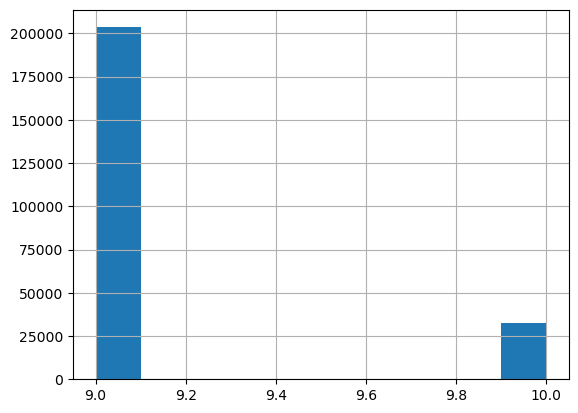

In [53]:
output['total_metric_weights'].hist()

In [54]:
# calculate the final score using the weights and if th value is null treat it as zero
output['final_score'] = 0
for metric in ['recency_score', 'frequency_score', 'monetary_score', 'response_rate', 'action_interest', 'event_stimulation_rate', 'response_rate', 'contactable_score']:
    metric_values = output[metric]
    metric_values_na_filled = metric_values.fillna(0)
    
    output['final_score'] = output['final_score'] + metric_values_na_filled*metric_weights[metric]

output['final_score'] = output['final_score']/output['total_metric_weights']

In [55]:
output.head()

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable,...,frequency_score,monetary_score,avg_gross_amount_euro,response_rate,product_category,action_interest,event_stimulation_rate,final_score,contactable_score,total_metric_weights
0,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,0.005089,0.023684,2227.0,0.0,Jewelry,NaN,0.050972,0.423744,0.99,9
1,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,0.005089,0.023684,2227.0,0.0,Women Accessory,0.081696,0.050972,0.389539,0.99,10
2,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,0.005089,0.023684,2227.0,0.0,Women Bags,NaN,0.050972,0.423744,0.99,9
3,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,0.005089,0.023684,2227.0,0.0,Women Ready-to-Wear,NaN,0.050972,0.423744,0.99,9
4,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,0.005089,0.023684,2227.0,0.0,Women Small Leather Goods,0.258453,0.050972,0.407215,0.99,10


In [56]:
for_dashboard.columns

Index(['client_id', 'client_country', 'client_gender', 'client_nationality',
       'client_city', 'client_premium_status', 'client_is_phone_contactable',
       'client_is_email_contactable',
       'client_is_instant_messaging_contactable', 'client_is_contactable',
       'action_collection', 'Guest_List', 'gross_amount_euro',
       'client_is_present', 'Women Accessory_interest',
       'Women Ready-to-Wear_interest', 'Woman Shoes_interest',
       'Women Bags_interest', 'Women Small Leather Goods_interest',
       'Jewelry_interest', 'Men Ready-to-Wear_interest', 'Men Shoes_interest',
       'Men Accessory_interest', 'Men Small Leather Goods_interest',
       'Men Bags_interest', 'Watches_interest', 'Child_interest'],
      dtype='object')

In [57]:
output.rename(columns={'final_score': 'Guest_List'}, inplace=True)
output.columns

Index(['client_id', 'client_country', 'client_gender', 'client_nationality',
       'client_city', 'client_premium_status', 'client_is_phone_contactable',
       'client_is_email_contactable',
       'client_is_instant_messaging_contactable', 'client_is_contactable',
       'action_collection', 'recency_score', 'transaction_count',
       'frequency_score', 'monetary_score', 'avg_gross_amount_euro',
       'response_rate', 'product_category', 'action_interest',
       'event_stimulation_rate', 'Guest_List', 'contactable_score',
       'total_metric_weights'],
      dtype='object')

In [58]:
output_final_columns = output.drop(columns=['recency_score', 'transaction_count',
       'frequency_score', 'monetary_score',
       'product_category', 'action_interest', 'event_stimulation_rate',
       'contactable_score', 'total_metric_weights']).copy()
output_final_columns.rename(columns={'avg_gross_amount_euro': 'gross_amount_euro', 'response_rate': 'client_is_present'}, inplace=True)
print(output_final_columns.columns)

Index(['client_id', 'client_country', 'client_gender', 'client_nationality',
       'client_city', 'client_premium_status', 'client_is_phone_contactable',
       'client_is_email_contactable',
       'client_is_instant_messaging_contactable', 'client_is_contactable',
       'action_collection', 'gross_amount_euro', 'client_is_present',
       'Guest_List'],
      dtype='object')


In [59]:
missing_cols = set(for_dashboard.columns) - set(output_final_columns.columns)
missing_cols

{'Child_interest',
 'Jewelry_interest',
 'Men Accessory_interest',
 'Men Bags_interest',
 'Men Ready-to-Wear_interest',
 'Men Shoes_interest',
 'Men Small Leather Goods_interest',
 'Watches_interest',
 'Woman Shoes_interest',
 'Women Accessory_interest',
 'Women Bags_interest',
 'Women Ready-to-Wear_interest',
 'Women Small Leather Goods_interest'}

In [60]:
# add the missing columns with 0 as default value
for col in action_collection_to_product_category.values():
    output_final_columns[f'{col}_interest'] = 0

output_final_columns['House_interest'] = 0
output_final_columns['HC_interest'] = 0

In [61]:
missing_cols = set(for_dashboard.columns) - set(output_final_columns.columns)
missing_cols

set()

In [62]:
output_final_columns

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable,...,Men Ready-to-Wear_interest,Men Accessory_interest,Men Shoes_interest,Men Bags_interest,Men Small Leather Goods_interest,Woman Shoes_interest,Watches_interest,Child_interest,House_interest,HC_interest
0,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,c00029531,KR,F,KOR,NaN,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236023,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236024,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236025,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236026,c99997359,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
output_product_interest = output_final_columns.copy()

In [64]:
for client_id, group in client_interests.groupby('client_id'):
    max_sfisf = group['sfisf'].max()
    max_sfisf_category = group[group['sfisf'] == max_sfisf]['product_category'].values[0]
    output_product_interest.loc[output_product_interest['client_id'] == client_id, f'{max_sfisf_category}_interest'] = 1

In [ ]:
output_product_interest[['House_interest', 'HC_interest']] = output_product_interest[['House_interest', 'HC_interest']].fillna(0)

In [ ]:
output_product_interest.to_csv('../features/for_dashboard_final.csv', index=False)